# Comparing calculations using Ronne Ice Shelf ApRES Data

In [1]:
# Setting up environment
# import hvplot.xarray - hvplot not working in this environment
import sys
import pandas as pd
sys.path.append("../../xapres_package/")
import ApRESDefs
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import importlib
import gcsfs
import math
import scipy.io


importlib.reload(ApRESDefs)
xa = ApRESDefs.xapres(loglevel='debug')

DEBUG    13:57:19 	 ApRESDefs.py @function _setup_logging line 539 - Stream logging level set to DEBUG
DEBUG    13:57:19 	 ApRESDefs.py @function _setup_logging line 540 - Add console handler to logger
DEBUG    13:57:19 	 ApRESDefs.py @function _setup_logging line 553 - File logging level set to DEBUG


Let's load in the raw .DAT files to xarray first.

In [2]:
xa.load_all('ex01')

DEBUG    13:57:19 	 ApRESDefs.py @function list_files line 215 - Find all the dat files in the directory ex01 with remote_load = False
DEBUG    13:57:19 	 ApRESDefs.py @function list_files line 229 - Finish call to list_files. Found 74 files
DEBUG    13:57:19 	 ApRESDefs.py @function load_all line 273 - Selecting all dats file because neither file_numbers_to_process nor file_names_to_process were supplied
DEBUG    13:57:19 	 ApRESDefs.py @function load_all line 277 - Starting loop over dat files
DEBUG    13:57:19 	 ApRESDefs.py @function load_all line 280 - Load dat file ex01/DIR2016-01-25-1728/DATA2016-01-25-1728.DAT
DEBUG    13:57:19 	 ApRESDefs.py @function _all_bursts_in_dat_to_xarray line 304 - This dat file has 1 bursts.
DEBUG    13:57:19 	 ApRESDefs.py @function _all_bursts_in_dat_to_xarray line 305 - bursts_to_process = All at the start of _all_bursts_in_dat_to_xarray.
DEBUG    13:57:19 	 ApRESDefs.py @function _all_bursts_in_dat_to_xarray line 309 - bursts_to_process set to "A

In [3]:
ds = xa.data

Now, let's stack the profiles for each burst.

In [4]:
ds_stacked = ds.profile.mean(dim=['chirp_num','attenuator_setting_pair']).sortby('time')

In [5]:
ds_stacked

<xarray.DataArray 'profile' (time: 74, profile_range: 4756)>
array([[ 2.54821033e-03+0.00000000e+00j,  2.58540030e-05+2.23209949e-03j,
        -1.47727321e-03+3.18608089e-05j, ...,
         1.01901771e-06-6.27661567e-07j,  1.31350698e-06+4.88498328e-07j,
        -5.50207334e-07+2.48022812e-06j],
       [ 2.61501400e-03+0.00000000e+00j,  2.34868616e-05+2.29101742e-03j,
        -1.51733375e-03+2.71036677e-05j, ...,
        -3.91751165e-06-2.15106039e-06j,  1.69901998e-06-4.57667643e-06j,
         5.16525998e-06+1.31240258e-06j],
       [ 2.63223658e-03+0.00000000e+00j,  2.32295345e-05+2.30618575e-03j,
        -1.52756256e-03+2.66190162e-05j, ...,
         2.13678278e-06-2.23505895e-06j,  1.46024830e-06+1.58910540e-06j,
        -9.90371090e-07+3.95942897e-07j],
       ...,
       [ 2.65227653e-03+0.00000000e+00j,  2.20160565e-05+2.32365534e-03j,
        -1.53901998e-03+2.48730894e-05j, ...,
         5.68207168e-07+8.47653711e-07j, -3.44696180e-07-4.35838232e-07j,
         9.97406184e-07+4.06091571e-08j],
       [ 2.65039201e-03+0.00000000e+00j,  2.20063670e-05+2.32199167e-03j,
        -1.53788260e-03+2.48595918e-05j, ...,
        -1.04375686e-06-5.52351706e-07j,  4.60342404e-07-1.20633422e-06j,
         1.29498518e-06+2.36798552e-07j],
       [ 2.64892436e-03+0.00000000e+00j,  2.19895294e-05+2.32070427e-03j,
        -1.53703537e-03+2.48294696e-05j, ...,
         7.74246487e-07-2.71175427e-06j,  1.42208903e-06+7.65115234e-07j,
        -8.20913812e-07+3.26062296e-07j]])
Coordinates:
  * time           (time) datetime64[ns] 2016-01-16T14:29:05 ... 2016-01-25T1...
  * profile_range  (profile_range) float64 0.0 0.2103 0.4206 ... 999.7 999.9
    filename       (time) <U47 'ex01/DIR2016-01-16-1428/DATA2016-01-16-1428.D...
    burst_number   (time) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0

Plotting the reflector amplitudes with xapres.

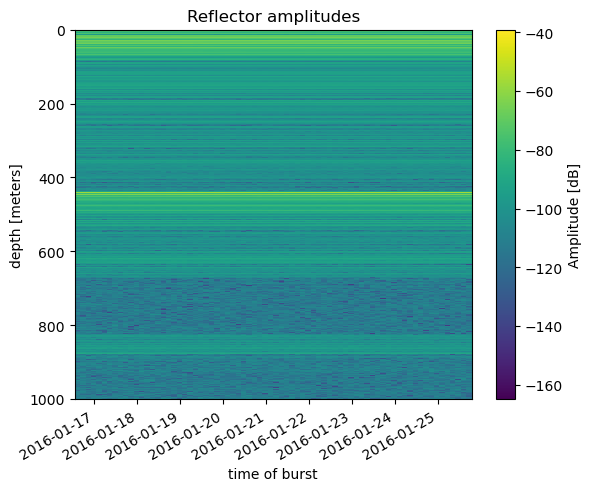

In [6]:
xa.dB(ds_stacked).plot(x='time',cbar_kwargs={'label':'Amplitude [dB]'})
plt.gca().invert_yaxis()
plt.title('Reflector amplitudes')
plt.show()

Now let's load in the results from using Irena's Matlab scripts.

In [7]:
mat = scipy.io.loadmat('G1.mat')
range_vankova = mat['site'][0][0][4][0][0][45][0]
profiles_ts_vankova = mat['site'][0][0][0]
time = ds_stacked.time.values

Pretty similar results, when comparing the two results.

Text(0.5, 1.0, 'A104 reflector amplitudes - Vankova')

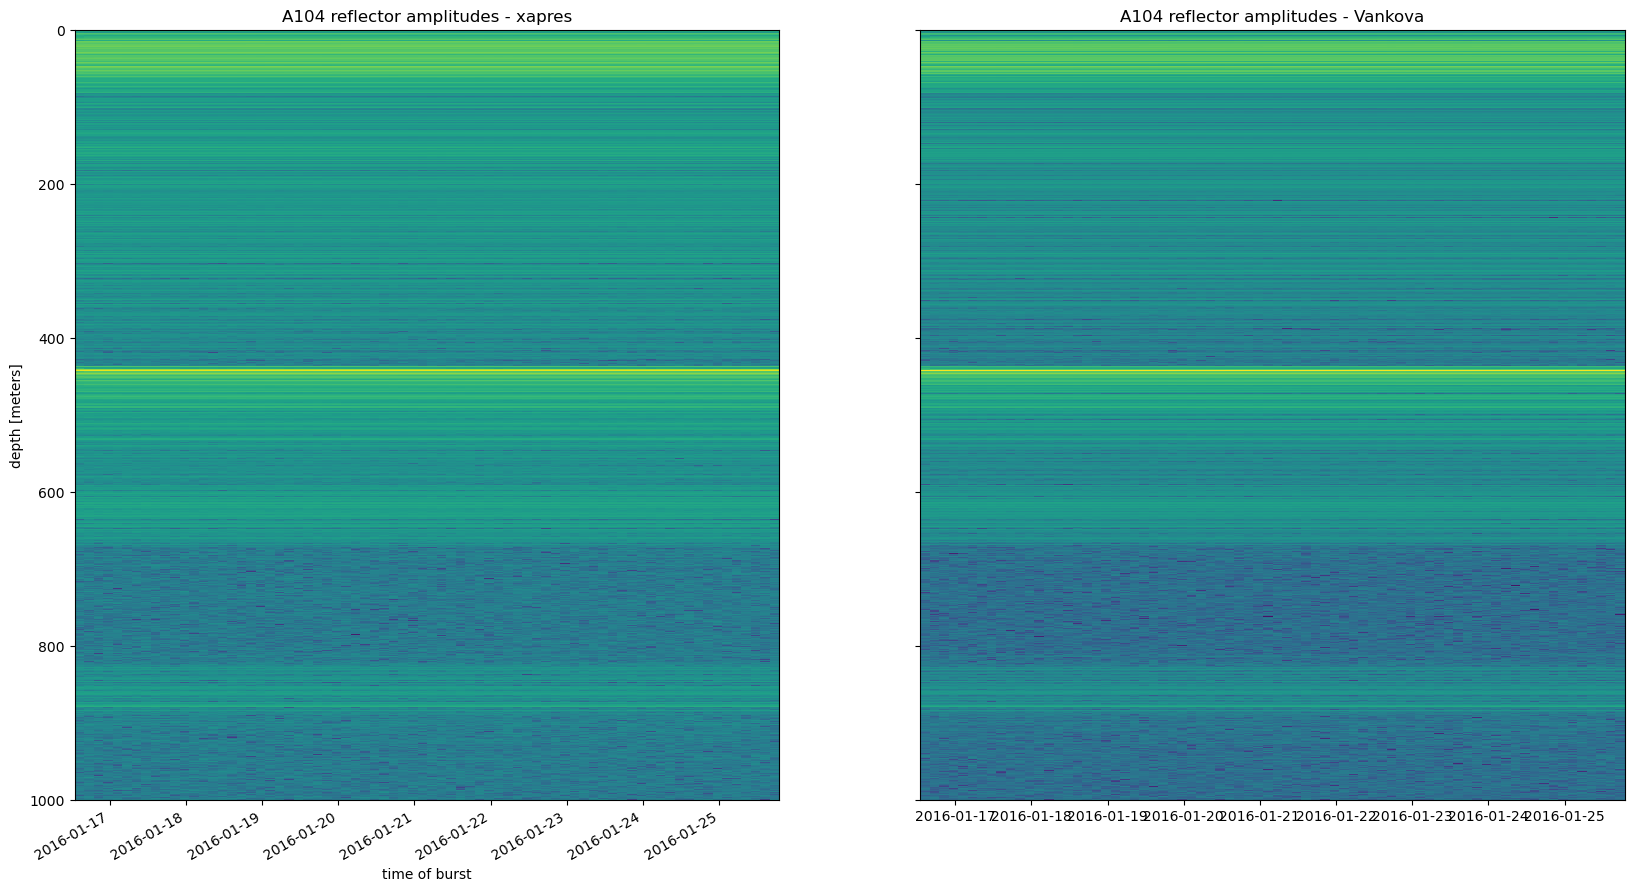

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize = (20,10))

xa.dB(ds_stacked).plot(ax=ax1,x='time',add_colorbar=False)
ax1.invert_yaxis()
ax1.set_title('A104 reflector amplitudes - xapres')
ax2.pcolormesh(time,range_vankova,np.transpose(xa.dB(profiles_ts_vankova)))
ax2.set_title('A104 reflector amplitudes - Vankova')


Comparing first and last bursts, it seems like not much change happened, regardless of calculation method. We see Irena's results have a different amplitude than ours, but the locations of the peaks are the same (as seen in the above plot).

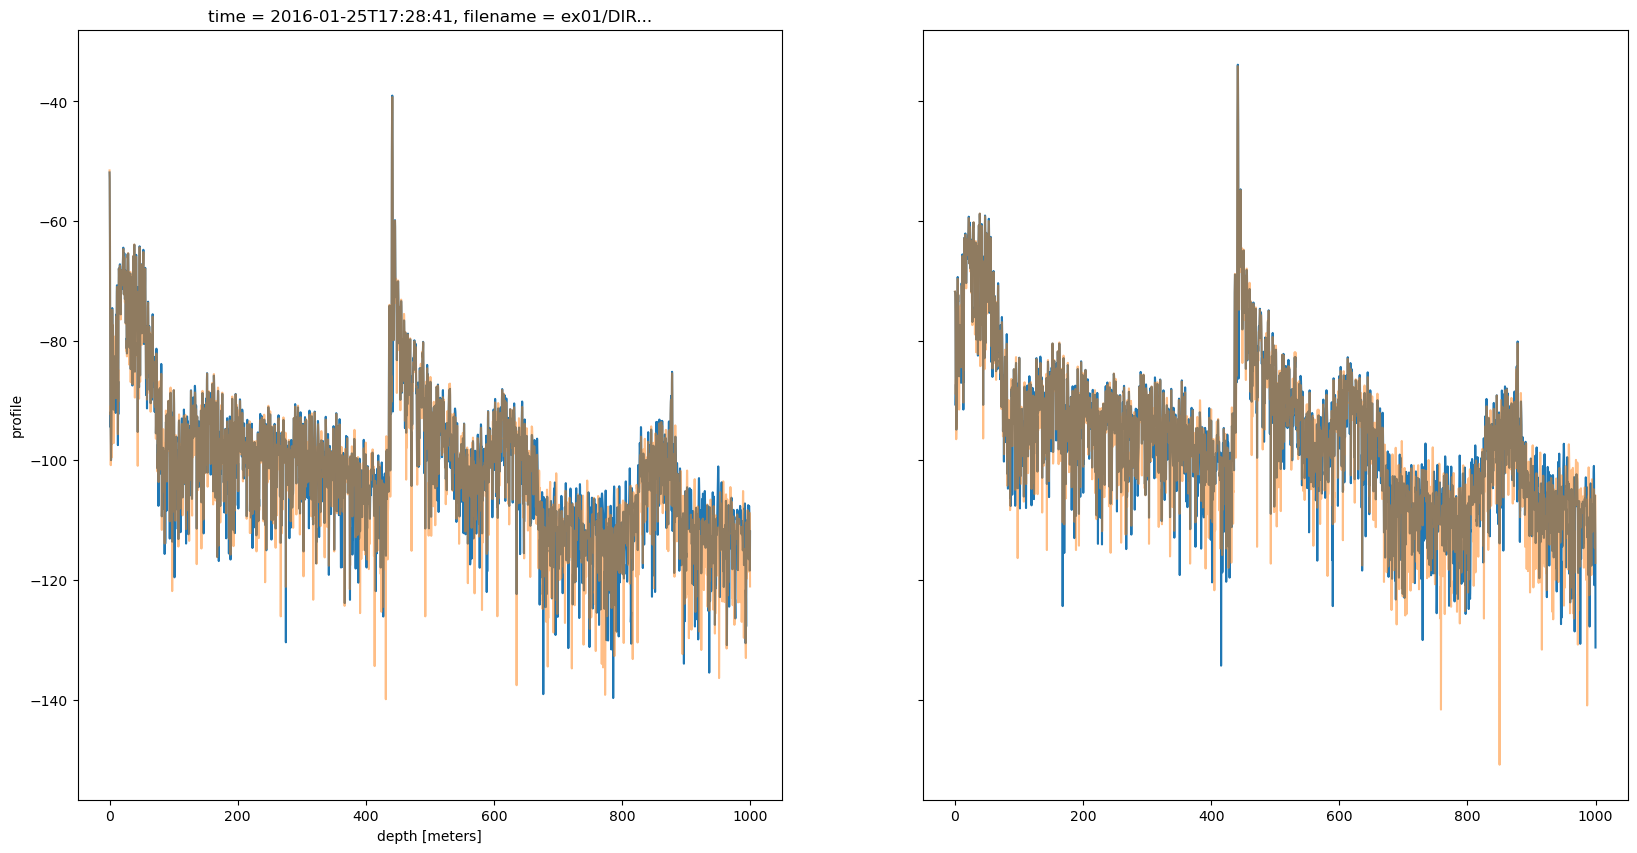

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize = (20,10))
xa.dB(ds_stacked.isel(time=0)).plot(ax=ax1)
xa.dB(ds_stacked.isel(time=-1)).plot(ax=ax1,alpha=0.5)

ax2.plot(range_vankova,xa.dB(profiles_ts_vankova[0,:]))
ax2.plot(range_vankova,xa.dB(profiles_ts_vankova[-1,:]),alpha=0.5)

Now, we calculate displacements with our results.

In [10]:
b1 = ds_stacked.isel(time=range(0,len(ds_stacked.time)-1)).where(ds_stacked.profile_range >= 10,drop=True)
b2 = ds_stacked.isel(time=range(1,len(ds_stacked.time))).where(ds_stacked.profile_range >= 10,drop=True)

In [11]:
ds, co, phi = xa.generate_range_diff(b1,b2,19,19,None,0,0.9)

INFO     13:58:23 	 ApRESDefs.py @function generate_range_diff line 594 - Time between bursts : [10799. 10799. 10800. 10800. 10800. 10800. 10800. 10800. 10800. 10800.
 10800. 10800. 10801. 10799. 10799. 10800. 10800. 10800. 10800. 10799.
 10800. 10800. 10800. 10800. 10798. 10800. 10800. 10800. 10801. 10799.
 10799. 10800. 10800. 10801. 10799. 10800. 10799. 10799. 10800. 10799.
 10801. 10799. 10799. 10800. 10799. 10800. 10799. 10801. 10799. 10800.
 10799. 10799. 10800. 10800. 10801. 10799. 10799. 10801. 10799. 10799.
 10799. 10799. 10799. 10799. 10800. 10801. 10799. 10799. 10799. 10799.
 10800. 10801. 10799.]s


In [12]:
ds

<xarray.Dataset>
Dimensions:        (time: 73, profile_range: 247)
Coordinates:
  * time           (time) datetime64[ns] 2016-01-16T17:29:04 ... 2016-01-25T1...
  * profile_range  (profile_range) float64 11.99 15.98 19.98 ... 990.9 994.9
Data variables:
    time_diff      (time) float64 1.08e+04 2.16e+04 ... 7.776e+05 7.884e+05
    range_diff     (time, profile_range) float64 0.001738 0.0002128 ... 0.0933
    err            (time, profile_range) float64 0.0006447 ... 0.007257

Here's the range difference between the first two bursts. No changes really

Text(0.5, 1.0, 'Range difference between 2 bursts')

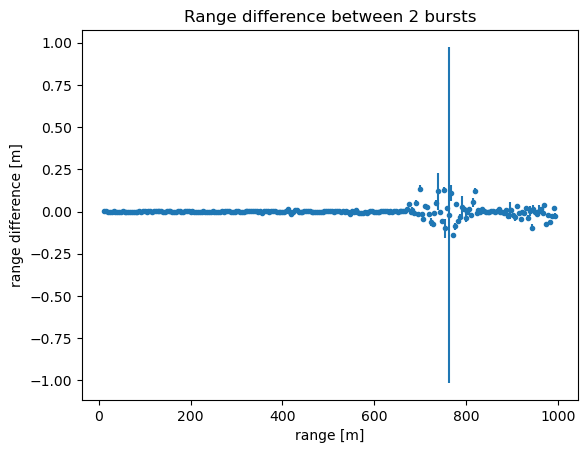

In [13]:
timestamp = ds.isel(time=0)
plt.errorbar(timestamp.profile_range,timestamp.range_diff,abs(timestamp.err),marker='.',linestyle='none')
plt.xlabel('range [m]')
plt.ylabel('range difference [m]')
plt.title('Range difference between 2 bursts')

Loading in Irena's results to compare.

In [14]:
mat = scipy.io.loadmat('G1_ts_fine_TT.mat')

In [15]:
time_unwr = mat['ct'][0][0][0][0][0][0][0]
dh_unwr = mat['ct'][0][0][0][0][0][1]
dhrange_unwr = mat['ct'][0][0][0][0][0][2][0]
dh_xcor = mat['ct'][0][0][1][0][0][0]
ampcor = mat['ct'][0][0][1][0][0][1]
phasecor = mat['ct'][0][0][1][0][0][2]
dhrange_xcor = mat['ct'][0][0][1][0][0][3][0]
time_xcor = mat['ct'][0][0][1][0][0][4][0]

Seems like our results fit.

Text(0.5, 1.0, 'Range difference between 2 bursts')

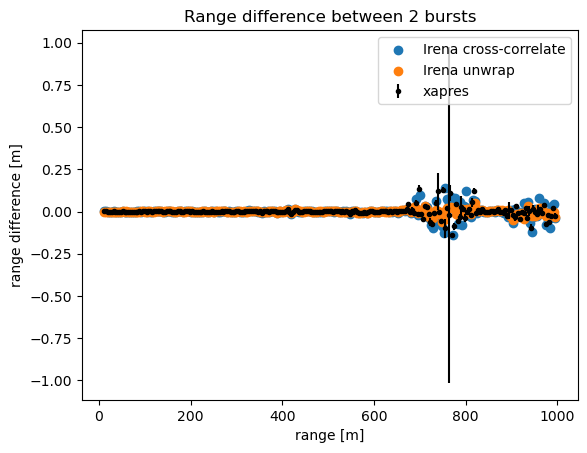

In [16]:
plt.scatter(dhrange_xcor,dh_xcor[1,:],label='Irena cross-correlate')
plt.scatter(dhrange_unwr,dh_unwr[1,:],label='Irena unwrap')

plt.errorbar(timestamp.profile_range,timestamp.range_diff,abs(timestamp.err),marker='.',linestyle='none',color='black',label = 'xapres')
plt.legend()
plt.xlabel('range [m]')
plt.ylabel('range difference [m]')
plt.title('Range difference between 2 bursts')

Now let's look at total displacement. If we know that the layers are towards the radar, we could assume that this slight negative movement is captured. Seems like theres a stronger blue streak at the base of the shelf?

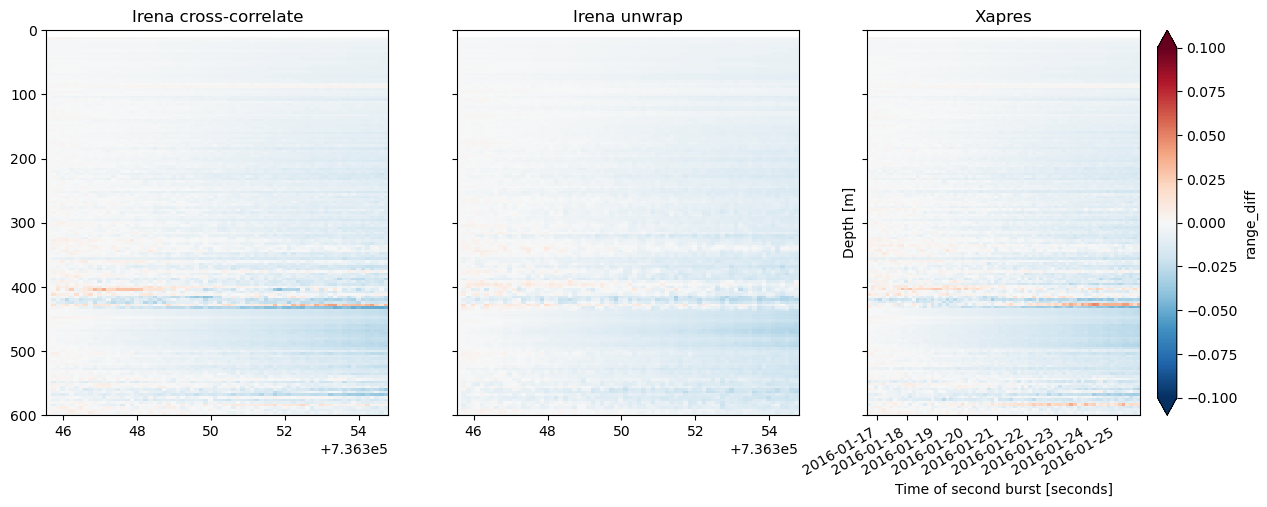

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize = (15,5))
ax1.pcolormesh(time_xcor,dhrange_xcor,np.transpose(dh_xcor),cmap='RdBu_r',vmin=-0.1,vmax=0.1)
ax1.set_title('Irena cross-correlate')
ax2.pcolormesh(time_unwr,dhrange_unwr,np.transpose(dh_unwr),cmap='RdBu_r',vmin=-0.1,vmax=0.1)
ax2.set_title('Irena unwrap')
ds.range_diff.cumsum(dim='time').plot(ax=ax3,x='time',cmap='RdBu_r',vmin=-0.1,vmax=0.1)
ax3.set_title('Xapres')
plt.ylim([0,600])
ax3.invert_yaxis()


Zooming in at the total displacement after ~1 week, we see that there is indeed a negative trend that gets stronger with depth. That's optimistic! This is roughly 1-2 cm total change.

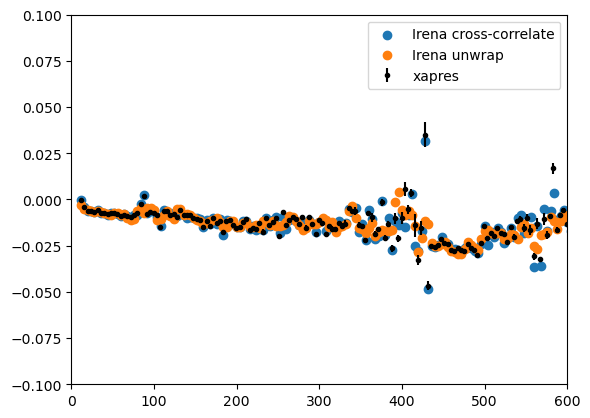

In [19]:
plt.errorbar(ds.profile_range,ds.range_diff.cumsum(dim='time').isel(time=-1),abs(ds.err.isel(time=-1)),marker='.',linestyle='none',color='black',label = 'xapres')
plt.scatter(dhrange_xcor,dh_xcor[-1,:],label='Irena cross-correlate')
plt.scatter(dhrange_unwr,dh_unwr[-1,:],label='Irena unwrap')
plt.ylim([-0.1,0.1])
plt.xlim([0,600])
plt.legend()


Strain rates are not too clear.

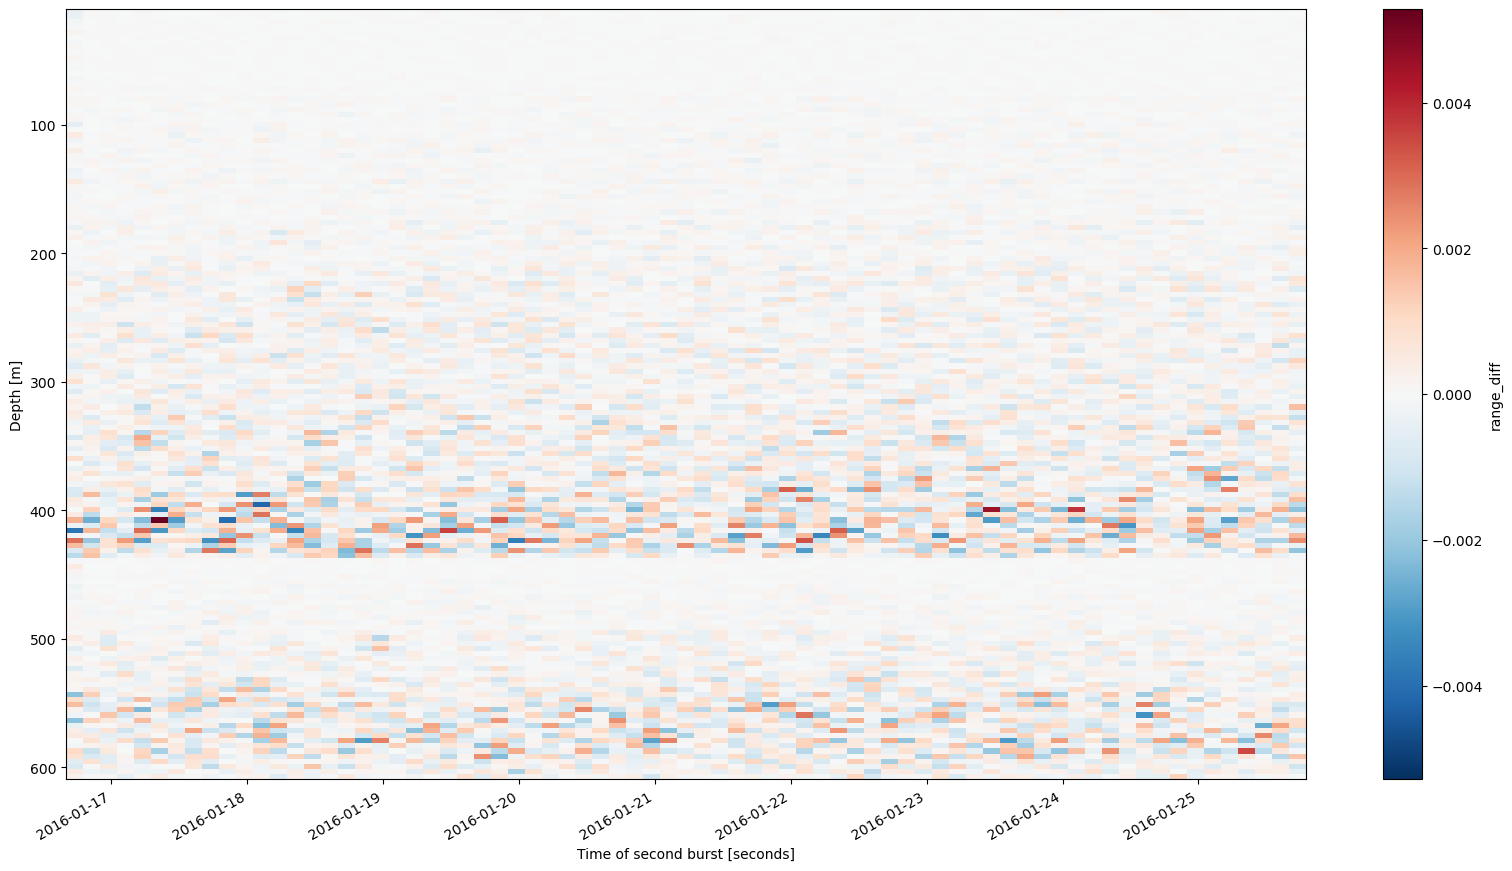

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
strain_rates = ds.range_diff.differentiate('profile_range')
strain_rates.isel(profile_range=range(0,150)).plot(x='time',cmap='RdBu_r')
ax.invert_yaxis()

# Trying to stack by day perhaps

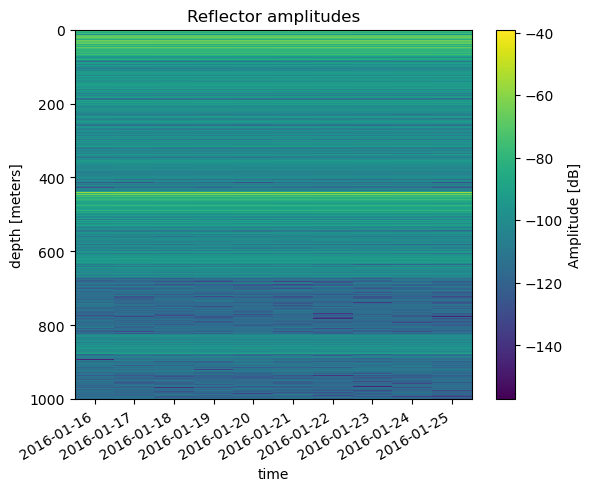

In [27]:
ds_1D = ds_stacked.resample(time='1D').mean(dim='time')
xa.dB(ds_1D).plot(x='time',cbar_kwargs={'label':'Amplitude [dB]'})
plt.gca().invert_yaxis()
plt.title('Reflector amplitudes')
plt.show()

In [37]:
b1 = ds_1D.isel(time=range(0,len(ds_1D.time)-1)).where(ds_1D.profile_range >= 10,drop=True)
b2 = ds_1D.isel(time=range(1,len(ds_1D.time))).where(ds_1D.profile_range >= 10,drop=True)
ds, co, phi = xa.generate_range_diff(b1,b2,19,19,None,0,0.9)

INFO     14:12:29 	 ApRESDefs.py @function generate_range_diff line 594 - Time between bursts : [86400. 86400. 86400. 86400. 86400. 86400. 86400. 86400. 86400.]s


Now the displacements are more obvious for sure.

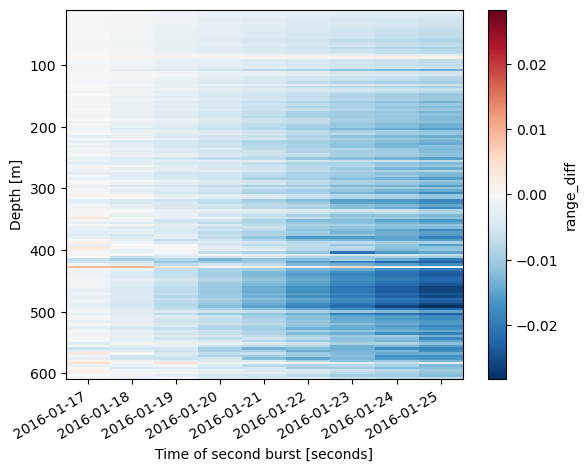

In [38]:
ds.range_diff.cumsum(dim='time').isel(profile_range=range(0,150)).plot(x='time',cmap='RdBu_r')
plt.gca().invert_yaxis()


(0.0, 600.0)

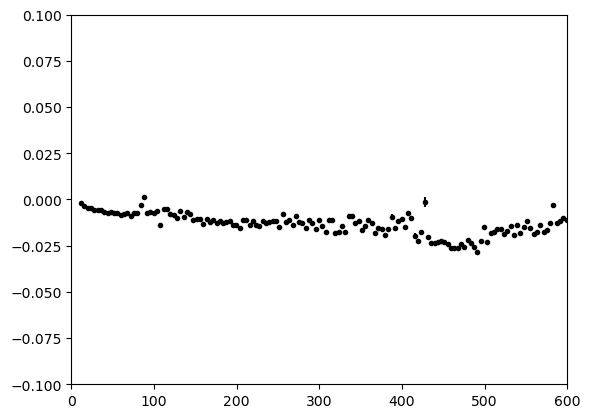

In [39]:
plt.errorbar(ds.profile_range,ds.range_diff.cumsum(dim='time').isel(time=-1),abs(ds.err.isel(time=-1)),marker='.',linestyle='none',color='black',label = 'xapres')
plt.ylim([-0.1,0.1])
plt.xlim([0,600])


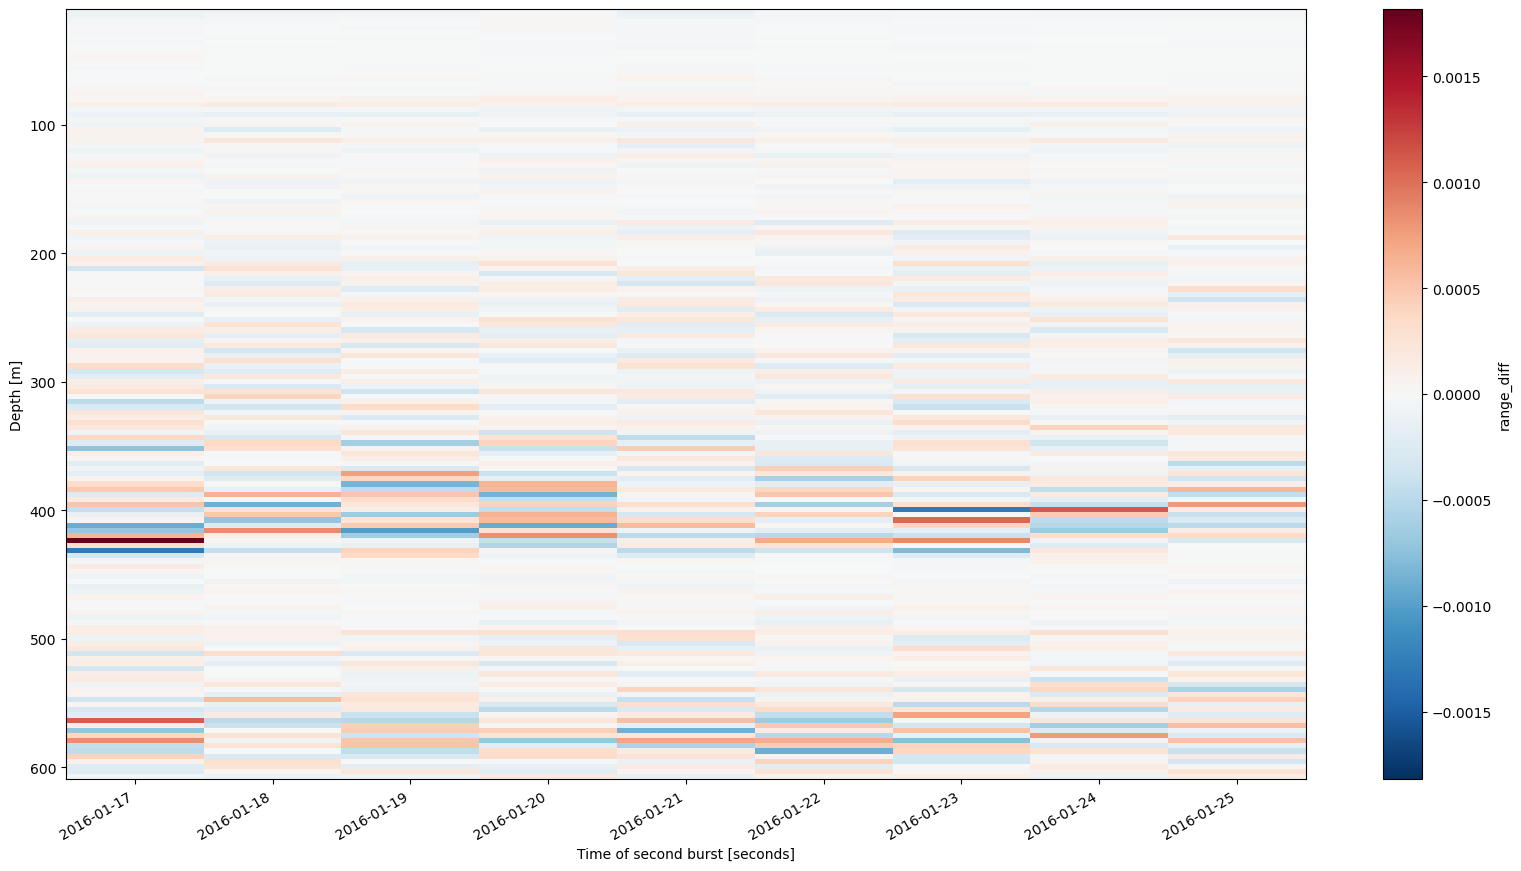

In [40]:
fig, ax = plt.subplots(figsize=(20,10))
strain_rates = ds.range_diff.differentiate('profile_range')
strain_rates.isel(profile_range=range(0,150)).plot(x='time',cmap='RdBu_r')
ax.invert_yaxis()

Still not that clear. Maybe I need to change the bin size for the displacements, or double check if the xarray differentiate function is properly working.